In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as emo_lib

In [9]:
# Load the dataset
file_path = "/content/drive/My Drive/Emotion_classify_Data.csv"
emo_data = emo_lib.read_csv(file_path)

In [10]:
emo_data.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [13]:
# Import necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [16]:
# Define preprocessing function
stop_words_set = set(stopwords.words("english"))
text_stemmer = PorterStemmer()

def clean_text(input_text):
    # Tokenize and lowercase the text
    tokens = word_tokenize(input_text.lower())
    # Remove stopwords, punctuation, words with 2 characters, and apply stemming
    cleaned_tokens = [
        text_stemmer.stem(word)
        for word in tokens
        if word not in stop_words_set and word not in string.punctuation and len(word) > 2
    ]
    return " ".join(cleaned_tokens)

# Apply preprocessing
emo_data["Processed_Text"] = emo_data["Comment"].apply(clean_text)

In [17]:
# Display processed data
print("Processed Text Data Preview:")
emo_data[["Comment", "Processed_Text"]].head()

Processed Text Data Preview:


,Comment,Processed_Text
0,i seriously hate one subject to death but now ...,serious hate one subject death feel reluct drop
1,im so full of life i feel appalled,full life feel appal
2,i sit here to write i start to dig out my feel...,sit write start dig feel think afraid accept p...
3,ive been really angry with r and i feel like a...,ive realli angri feel like idiot trust first p...
4,i feel suspicious if there is no one outside l...,feel suspici one outsid like raptur happen someth


# EDA

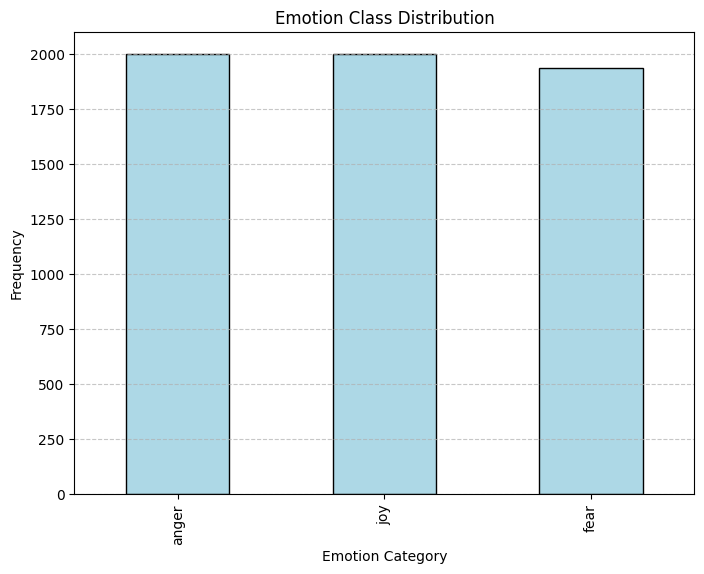

In [18]:
# Plot class distribution
plt.figure(figsize=(8, 6))
emo_data["Emotion"].value_counts().plot(kind="bar", color="lightblue", edgecolor="black")
plt.title("Emotion Class Distribution")
plt.xlabel("Emotion Category")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


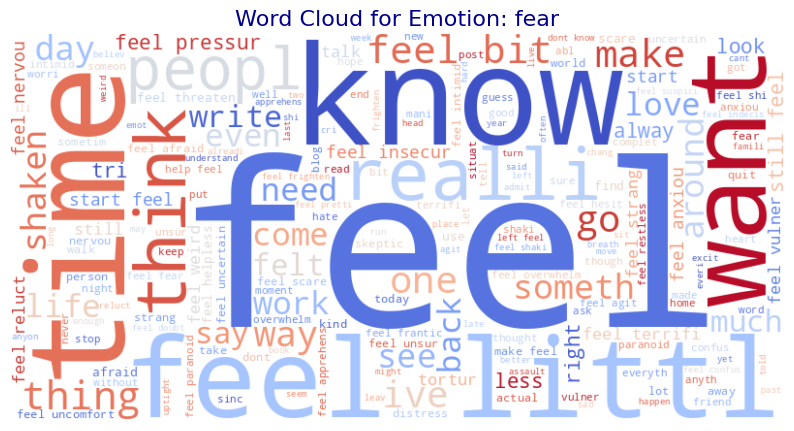

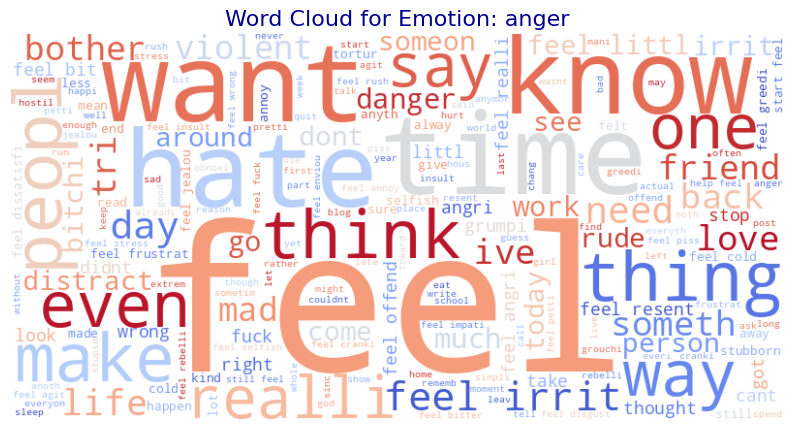

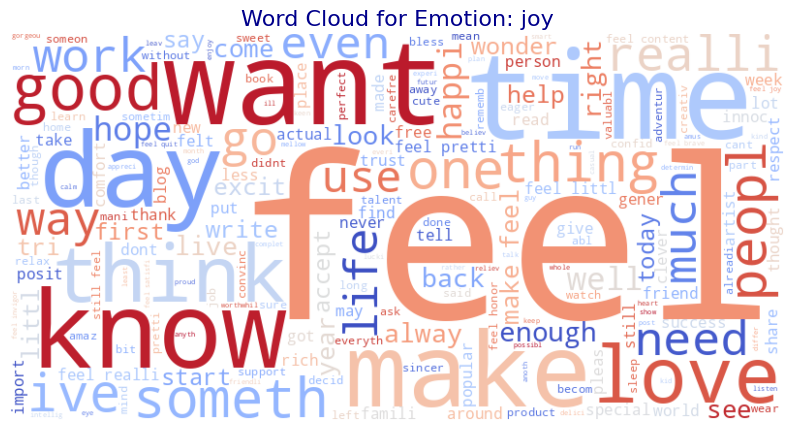

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate Word Clouds for each emotion
emotion_labels = emo_data["Emotion"].unique()

for label in emotion_labels:
    # Combine all processed text for the current label
    label_text = " ".join(emo_data[emo_data["Emotion"] == label]["Processed_Text"])
    word_cloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        colormap="coolwarm"  # Updated color scheme
    ).generate(label_text)

    # Display the Word Cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Emotion: {label}", fontsize=16, color="darkblue")
    plt.show()


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract features using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 1000 features
tfidf_features = tfidf_vectorizer.fit_transform(emo_data["Processed_Text"]).toarray()

# Get feature names
tfidf_selected_features = tfidf_vectorizer.get_feature_names_out()


# Convert features to a DataFrame
tfidf_feature_data = emo_lib.DataFrame(tfidf_features, columns=tfidf_selected_features)
tfidf_feature_data["Emotion"] = emo_data["Emotion"]



In [23]:
tfidf_feature_data

,aac,aaron,abandon,abbigail,abc,abdomen,abelard,abid,abil,abit,...,zealand,zen,zendikar,zero,zest,zhu,ziplin,zombi,zone,Emotion
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fear
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,anger
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fear
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,joy
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fear
5933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,anger
5934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,joy
5935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fear


In [25]:
len(tfidf_feature_data.columns)

5001